# Modelo Fraiman

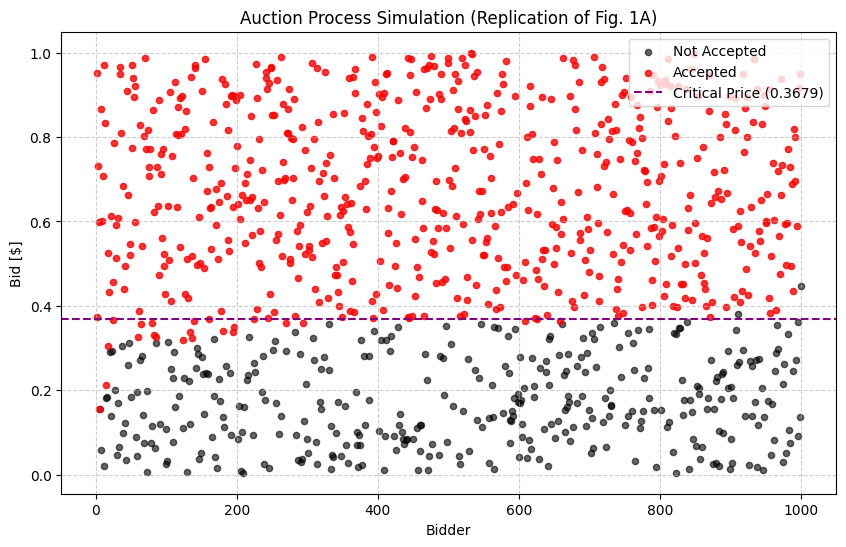

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(42)

# Parameters from the paper's simulation (Fig. 1A)
N = 1000
mu = 0
sigma = 0.3

# Generate a sequence of 1000 bids from a Log-Normal distribution
bids = np.random.uniform(0, 1, N)

# Initialize lists to store accepted and non-accepted bids
accepted_bids = []
non_accepted_bids = []
accepted_bid_indices = []
non_accepted_bid_indices = []
pending_bids = []

# Implement the auction mechanism from the paper
for i, new_bid in enumerate(bids):
    bid_index = i + 1

    # If there are no pending bids, the new bid is just added to the pending queue
    if not pending_bids:
        pending_bids.append(new_bid)
        continue

    # Find the maximum value among the pending bids
    max_pending_bid = max(pending_bids)

    # Apply the selling rule:
    if new_bid < max_pending_bid:
        # A sale occurs. Find the index of the accepted bid
        accepted_bid_index = np.where(bids == max_pending_bid)[0][0] + 1
        accepted_bids.append(max_pending_bid)
        accepted_bid_indices.append(accepted_bid_index)
        
        # The accepted bid is removed from the pending list
        pending_bids.remove(max_pending_bid)
        
        # The current bid is not accepted at this time and becomes a new pending bid
        non_accepted_bids.append(new_bid)
        non_accepted_bid_indices.append(bid_index)
        pending_bids.append(new_bid)
    else:
        # No sale occurs, the new bid is added to the pending list
        pending_bids.append(new_bid)
        non_accepted_bids.append(new_bid)
        non_accepted_bid_indices.append(bid_index)

# After the loop, any remaining bids are "frozen" and not accepted
for bid in pending_bids:
    non_accepted_bids.append(bid)
    non_accepted_bid_indices.append(np.where(bids == bid)[0][0] + 1)
    
# Get the indices and values for plotting
accepted_indices_plot = [i for i, b in enumerate(bids) if b in accepted_bids]
non_accepted_indices_plot = [i for i, b in enumerate(bids) if b not in accepted_bids]

accepted_values_plot = [bids[i] for i in accepted_indices_plot]
non_accepted_values_plot = [bids[i] for i in non_accepted_indices_plot]

accepted_indices_plot = [i + 1 for i in accepted_indices_plot]
non_accepted_indices_plot = [i + 1 for i in non_accepted_indices_plot]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(non_accepted_indices_plot, non_accepted_values_plot, c='black', label='Not Accepted', s=20, alpha=0.6)
plt.scatter(accepted_indices_plot, accepted_values_plot, c='red', label='Accepted', s=20, alpha=0.8)

# Add critical price line based on the paper's value
critical_price = 1/np.e
plt.axhline(y=critical_price, color='purple', linestyle='--', label=f'Critical Price ({round(critical_price, 4)})')

plt.title('Auction Process Simulation (Replication of Fig. 1A)')
plt.xlabel('Bidder')
plt.ylabel('Bid [$]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.show()
#plt.savefig('auction_scatter_plot.png')
#print("Plot saved to auction_scatter_plot.png")

# Modificación de m

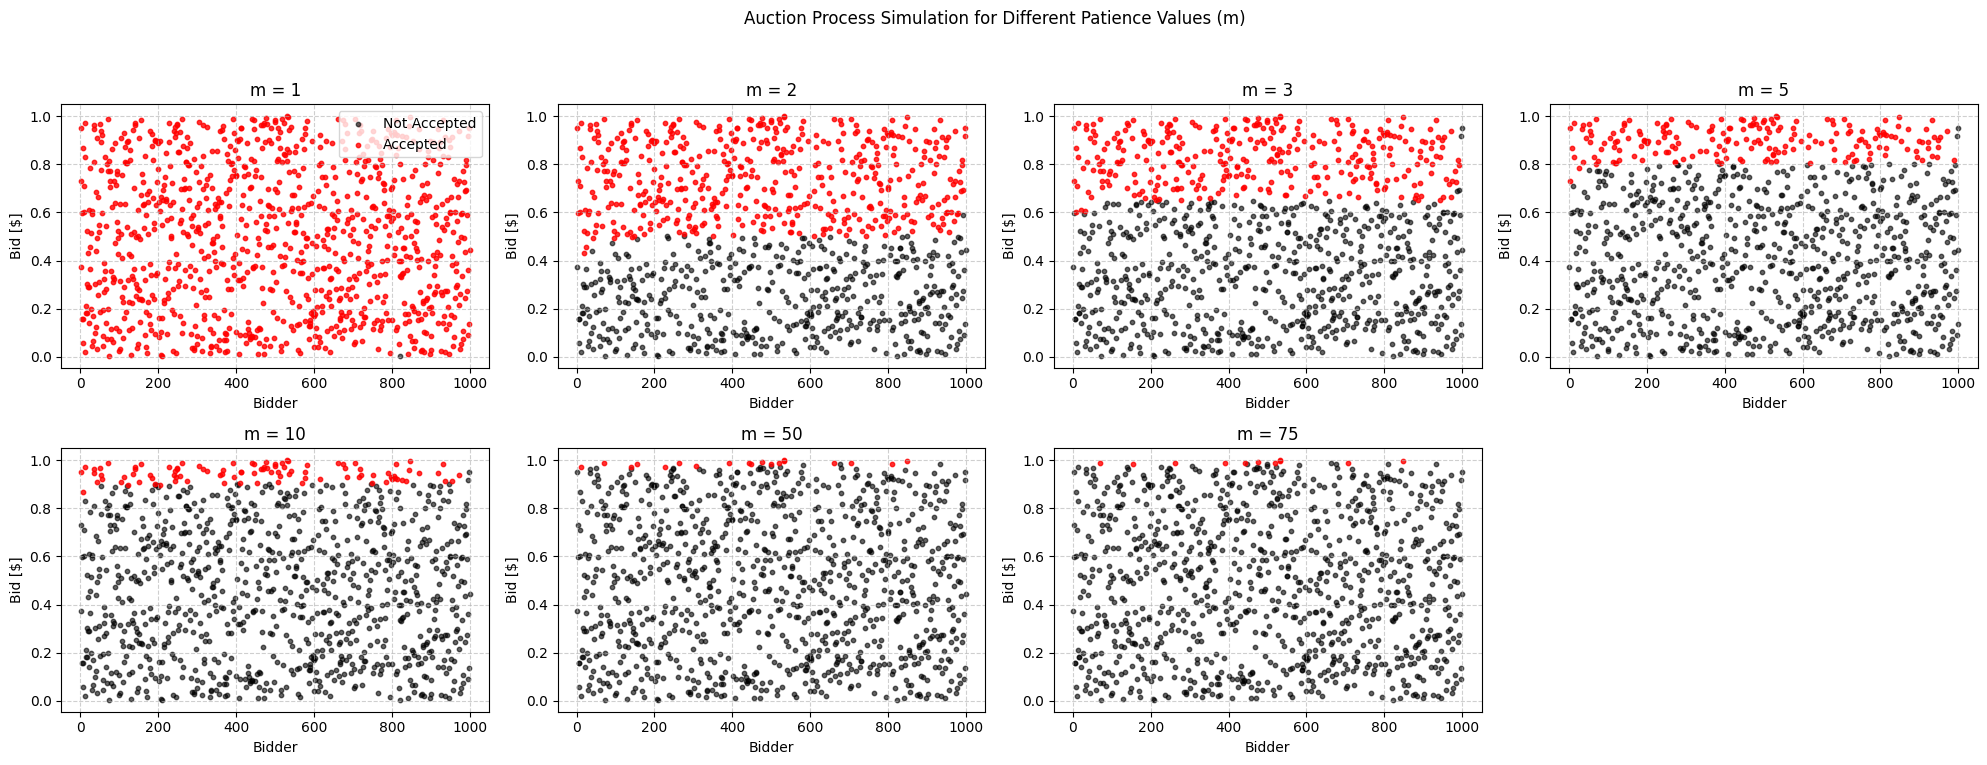

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(42)

# Parameters
N = 1000
mu = 0
sigma = 0.3
m_values = [1, 2, 3, 5, 10, 50, 75]  # Diferentes valores de "paciencia"

# Generar una secuencia de 1000 ofertas uniformes entre 0 y 1 (misma para todos los m)
bids = np.random.uniform(0, 1, N)

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

for idx, m in enumerate(m_values):
    # Inicializar listas para almacenar las ofertas aceptadas y no aceptadas
    accepted_bids = []
    non_accepted_bids = []
    accepted_bid_indices = []
    non_accepted_bid_indices = []

    # Estructura para las ofertas pendientes: cada elemento es un dict con 'bid', 'index', 'wait'
    pending_bids = []

    for i, new_bid in enumerate(bids):
        bid_index = i + 1

        # Añadir la nueva oferta a la lista de pendientes, con contador de paciencia en 0
        pending_bids.append({'bid': new_bid, 'index': bid_index, 'wait': 0})

        # Si hay más de una oferta pendiente, incrementar el contador de paciencia de la máxima
        if len(pending_bids) > 1:
            # Encontrar la oferta máxima pendiente
            max_idx = np.argmax([b['bid'] for b in pending_bids])
            pending_bids[max_idx]['wait'] += 1

            # Si la paciencia de la máxima llegó a m, se vende
            if pending_bids[max_idx]['wait'] >= m:
                accepted_bids.append(pending_bids[max_idx]['bid'])
                accepted_bid_indices.append(pending_bids[max_idx]['index'])
                # Eliminar la oferta aceptada de la lista de pendientes
                del pending_bids[max_idx]

    # Al final, las ofertas que quedan pendientes no son aceptadas
    for b in pending_bids:
        non_accepted_bids.append(b['bid'])
        non_accepted_bid_indices.append(b['index'])

    # También, las ofertas que nunca fueron aceptadas durante el proceso
    # (es decir, todas menos las aceptadas)
    all_accepted_set = set(accepted_bid_indices)
    for i, bid in enumerate(bids):
        idx_bid = i + 1
        if idx_bid not in all_accepted_set and idx_bid not in non_accepted_bid_indices:
            non_accepted_bids.append(bid)
            non_accepted_bid_indices.append(idx_bid)

    # Preparar los datos para el gráfico
    accepted_indices_plot = accepted_bid_indices
    non_accepted_indices_plot = non_accepted_bid_indices

    accepted_values_plot = [bids[i-1] for i in accepted_indices_plot]
    non_accepted_values_plot = [bids[i-1] for i in non_accepted_indices_plot]

    # Crear el scatter plot en el subplot correspondiente
    ax = axes[idx]
    ax.scatter(non_accepted_indices_plot, non_accepted_values_plot, c='black', label='Not Accepted', s=10, alpha=0.6)
    ax.scatter(accepted_indices_plot, accepted_values_plot, c='red', label='Accepted', s=10, alpha=0.8)

    # Línea de precio crítico (opcional, descomentar si se desea)
    # critical_price = (1/np.e)
    # ax.axhline(y=critical_price, color='purple', linestyle='--', label=f'Critical Price ({round(critical_price, 4)})')

    ax.set_title(f'm = {m}')
    ax.set_xlabel('Bidder')
    ax.set_ylabel('Bid [$]')
    ax.grid(True, linestyle='--', alpha=0.6)
    if idx == 0:
        ax.legend()

# Si hay más subplots de los necesarios, ocultarlos
for j in range(len(m_values), len(axes)):
    axes[j].axis('off')

plt.suptitle('Auction Process Simulation for Different Patience Values (m)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

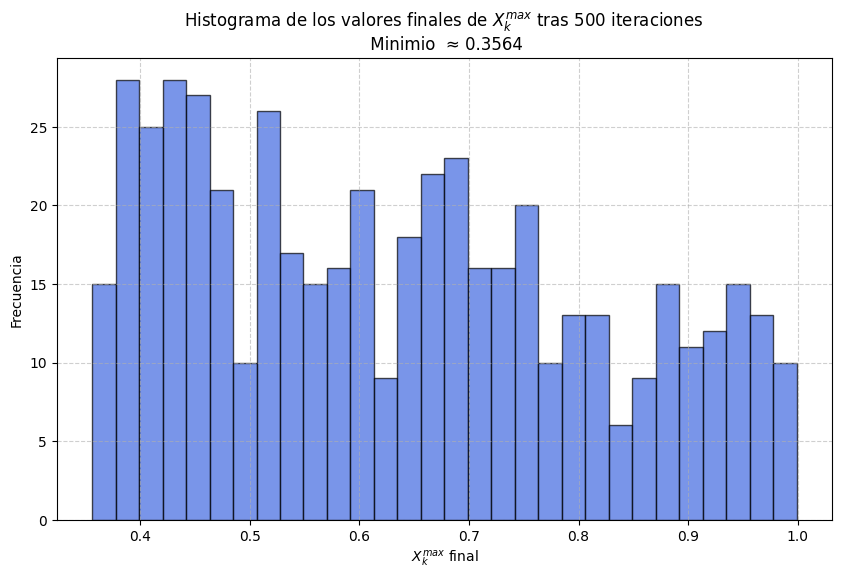

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_x_k_max(num_bids):
    """
    Simula el valor de X_k^max a lo largo de una secuencia de ofertas.

    Args:
        num_bids (int): Número total de ofertas a simular.

    Returns:
        list: Lista con el valor de X_k^max en cada paso k.
    """
    bids = np.random.uniform(0, 1, num_bids)
    pending_bids = []
    x_k_max_values = []
    for k in range(num_bids):
        new_bid = bids[k]
        if not pending_bids:
            pending_bids.append(new_bid)
            x_k_max_values.append(new_bid)
            continue
        current_x_k_max = max(pending_bids)
        if new_bid < current_x_k_max:
            pending_bids.remove(current_x_k_max)
        pending_bids.append(new_bid)
        new_x_k_max = max(pending_bids)
        x_k_max_values.append(new_x_k_max)
    return x_k_max_values

# Realizar muchas simulaciones y guardar el último X_k^max de cada una
num_bids = 3000
num_iteraciones = 500
ultimos_x_k_max = []

for _ in range(num_iteraciones):
    valores = simulate_x_k_max(num_bids)
    ultimos_x_k_max.append(valores[-1])

min_value = np.min(ultimos_x_k_max)
# Calcular la esperanza (media) de la distribución de X_k^max final
# Graficar el histograma de los valores finales de X_k^max
plt.figure(figsize=(10,6))
plt.hist(ultimos_x_k_max, bins=30, color='royalblue', edgecolor='black', alpha=0.7)
plt.title(f'Histograma de los valores finales de $X_k^{{max}}$ tras {num_iteraciones} iteraciones \n Minimio  ≈ {min_value:.4f}')
plt.xlabel('$X_k^{max}$ final')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Simulating for m=10: 100%|██████████| 1000/1000 [01:34<00:00, 10.63it/s]


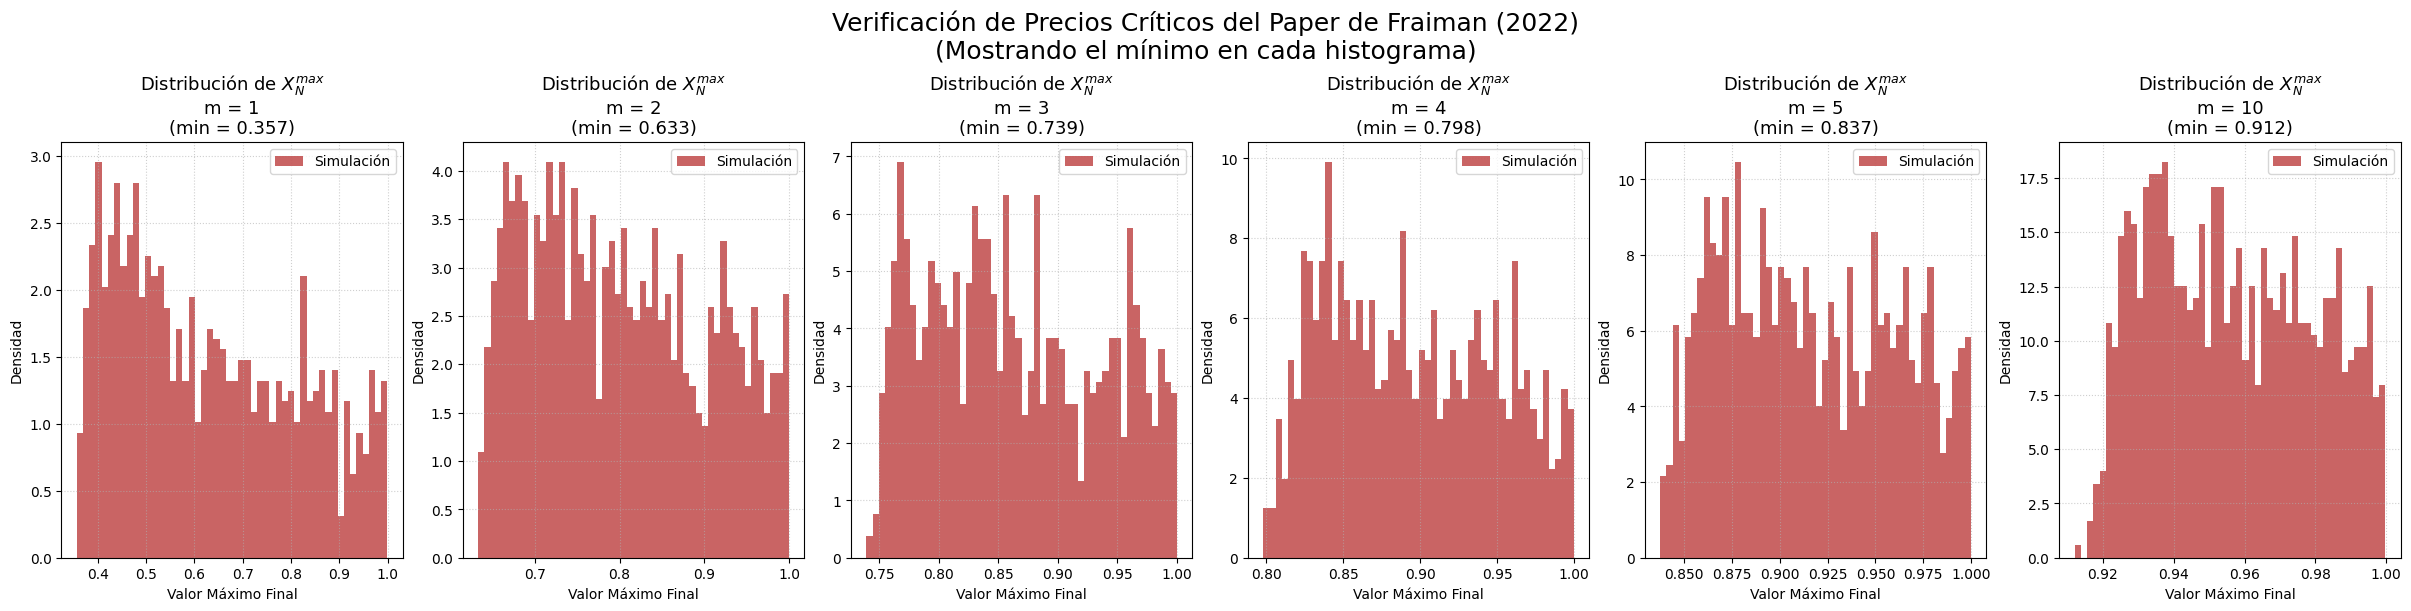

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def run_auction_simulation_final(N, m):
    """
    Ejecuta una simulación de subasta con la lógica correcta del paper de Fraiman (2022).
    Un campeón se vende si llegan 'm' ofertas consecutivas de menor valor.

    Args:
        N (int): Número de postores (bidders).
        m (int): Parámetro de paciencia (número de ofertas menores consecutivas).

    Returns:
        float: El valor de la oferta máxima que queda al final del proceso (X_N^max).
    """
    # Se generan todas las ofertas al principio
    bids = np.random.uniform(0, 1, N)
    
    pending_bids = []
    patience_counter = 0
    current_max_bid = -1 # Inicializar con un valor imposible

    for new_bid in bids:
        if not pending_bids:
            # Si es la primera oferta, simplemente se añade
            pending_bids.append(new_bid)
            current_max_bid = new_bid
            continue
        
        # Lógica de paciencia
        if new_bid < current_max_bid:
            patience_counter += 1
        else: # new_bid >= current_max_bid
            patience_counter = 0
        
        # La nueva oferta siempre entra a la lista de pendientes
        pending_bids.append(new_bid)
        
        # Comprobar si se cumple la condición de venta
        if patience_counter >= m:
            # Se vende el 'current_max_bid', se elimina de la lista y se resetea el contador
            pending_bids.remove(current_max_bid)
            patience_counter = 0
        
        # Se actualiza el campeón para la siguiente iteración
        if pending_bids:
            current_max_bid = max(pending_bids)
        else:
            current_max_bid = -1

    # Devolver el máximo de las ofertas que quedaron sin vender
    if pending_bids:
        return max(pending_bids)
    else:
        return np.nan

# --- Parámetros de la Simulación ---
num_simulations = 1000 # Aumentamos para mayor precisión
N = 5000
m_values = [1, 2, 3, 4, 5, 10] # Los dos casos de interés

final_max_bids = {m: [] for m in m_values}

# --- Ejecución de las Simulaciones ---
for m in m_values:
    # Usamos tqdm para una barra de progreso
    for _ in tqdm(range(num_simulations), desc=f"Simulating for m={m}"):
        final_max = run_auction_simulation_final(N, m)
        if not np.isnan(final_max):
            final_max_bids[m].append(final_max)

# --- Visualización de Resultados ---
fig, axes = plt.subplots(1, 6, figsize=(24, 6), constrained_layout=True)

for idx, m in enumerate(m_values):
    ax = axes[idx]
    ax.hist(final_max_bids[m], bins=50, density=True, color='firebrick', alpha=0.7, label='Simulación')
    min_val = np.min(final_max_bids[m]) if len(final_max_bids[m]) > 0 else float('nan')
    ax.set_title(f'Distribución de $X_N^{{max}}$\nm = {m}\n(min = {min_val:.3f})', fontsize=13)
    ax.set_xlabel('Valor Máximo Final')
    ax.set_ylabel('Densidad')
    ax.legend()
    ax.grid(True, linestyle=':', alpha=0.6)

plt.suptitle(f'Verificación de Precios Críticos del Paper de Fraiman (2022)\n(Mostrando el mínimo en cada histograma)', fontsize=18)
plt.show()


# Modifación del modelo

# Memoria finita del venedor

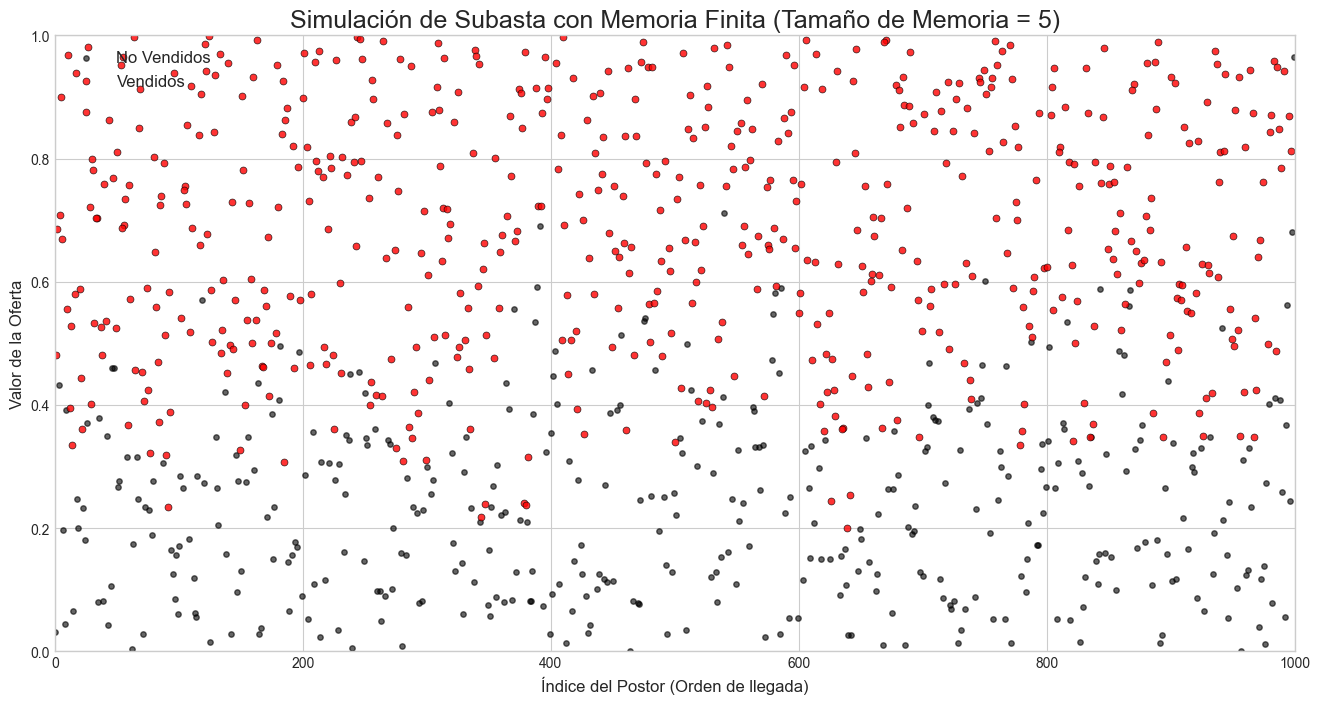

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def run_auction_with_finite_memory(N, memory_size):
    """
    Simula una subasta con m=1 pero con una memoria finita para encontrar el máximo.
    El máximo (campeón) se busca solo dentro de las últimas 'memory_size' ofertas activas.

    Args:
        N (int): Número total de postores.
        memory_size (int): El tamaño de la ventana de memoria para buscar el máximo.

    Returns:
        tuple: Una tupla conteniendo (lista de ofertas vendidas, lista de ofertas pendientes/no vendidas).
    """
    # Generar todas las ofertas al principio
    bids = np.random.uniform(0, 1, N)
    
    # Usaremos diccionarios para rastrear tanto el valor como el índice original de cada oferta
    pending_bids = []
    sold_bids = []

    for i, bid_value in enumerate(bids):
        new_bid = {'bid': bid_value, 'index': i}

        # Si no hay ofertas pendientes, simplemente se añade la nueva y continuamos
        if not pending_bids:
            pending_bids.append(new_bid)
            continue
            
        # --- LÓGICA DE MEMORIA FINITA ---
        # Definimos la ventana de memoria: las últimas 'memory_size' ofertas pendientes
        memory_window = pending_bids[-memory_size:]
        
        # El campeón es el máximo, pero SOLO dentro de esa ventana
        champion = max(memory_window, key=lambda x: x['bid'])
        
        # Aplicamos la regla de m=1: si la nueva oferta es menor que el campeón, se vende el campeón
        if new_bid['bid'] < champion['bid']:
            sold_bids.append(champion)
            pending_bids.remove(champion)
        
        # La nueva oferta siempre entra a la lista de pendientes
        pending_bids.append(new_bid)

    return sold_bids, pending_bids

# --- PARÁMETROS DE LA SIMULACIÓN ---
N = 1000  # Número total de ofertas
MEMORY_SIZE = 5 # Tamaño de la memoria. ¡Puedes experimentar cambiando este valor!

# --- EJECUCIÓN DE UNA ÚNICA SIMULACIÓN ---
sold, unsold = run_auction_with_finite_memory(N, MEMORY_SIZE)

# --- PREPARACIÓN DE DATOS PARA EL GRÁFICO ---
# Extraemos los índices (eje x) y los valores (eje y) de las ofertas
sold_indices = [item['index'] for item in sold]
sold_values = [item['bid'] for item in sold]

unsold_indices = [item['index'] for item in unsold]
unsold_values = [item['bid'] for item in unsold]

# --- VISUALIZACIÓN ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(16, 8))

# Graficamos las ofertas no vendidas en negro
plt.scatter(unsold_indices, unsold_values, c='black', label='No Vendidos', s=15, alpha=0.6)

# Graficamos las ofertas vendidas en rojo
plt.scatter(sold_indices, sold_values, c='red', label='Vendidos', s=25, alpha=0.8, edgecolors='black', linewidths=0.5)

plt.title(f'Simulación de Subasta con Memoria Finita (Tamaño de Memoria = {MEMORY_SIZE})', fontsize=18)
plt.xlabel('Índice del Postor (Orden de llegada)', fontsize=12)
plt.ylabel('Valor de la Oferta', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.xlim(0, N)
plt.ylim(0, 1)

plt.show()

# Paciencia finita del comprador

## Fijo

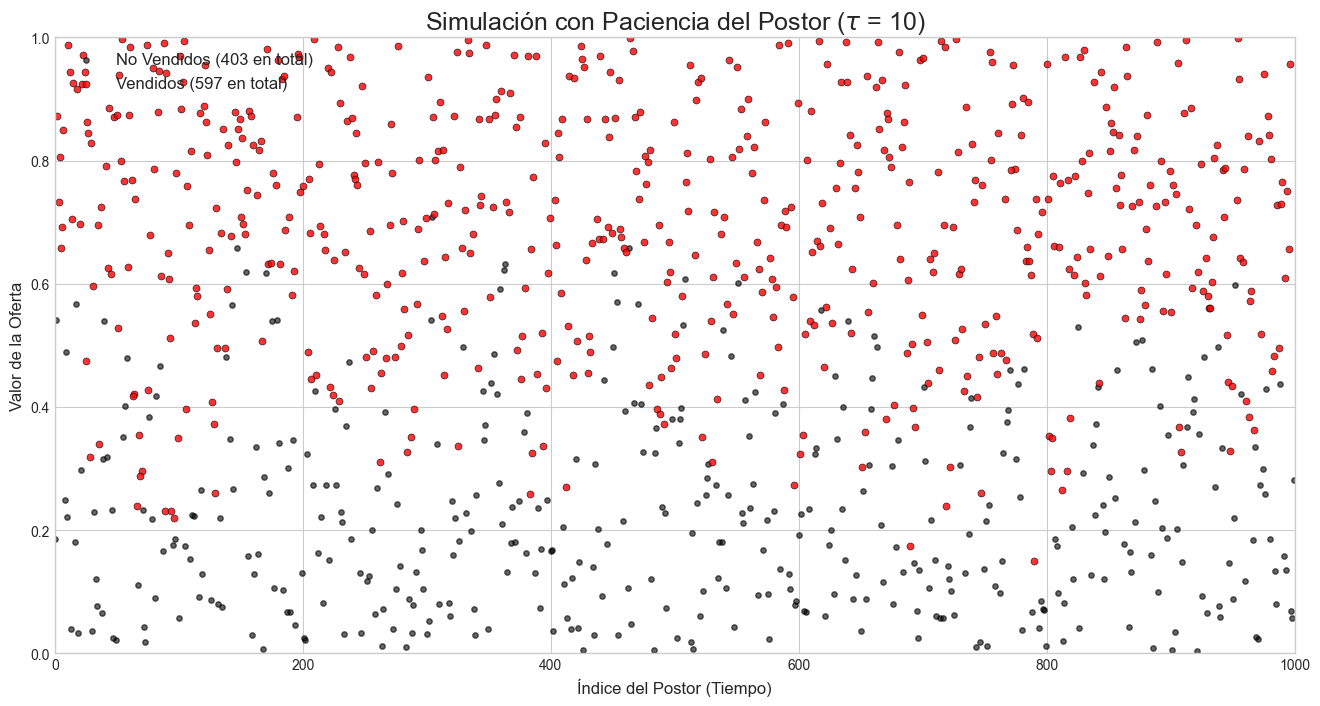

In [79]:
import numpy as np
import matplotlib.pyplot as plt

def run_auction_with_bidder_patience(N, tau):
    """
    Simula una subasta donde los postores tienen una paciencia finita 'tau'.
    Si la oferta de un postor no se vende en 'tau' pasos de tiempo, se retira.

    Args:
        N (int): Número total de postores.
        tau (int): La paciencia o ventana de interés de cada postor.

    Returns:
        tuple: Contiene (ofertas vendidas, ofertas pendientes al final, ofertas expiradas).
    """
    bids = np.random.uniform(0, 1, N)
    
    pending_bids = []
    sold_bids = []
    expired_bids = [] # Nueva lista para rastrear las ofertas retiradas

    # 'i' representa el paso de tiempo actual
    for i, bid_value in enumerate(bids):
        current_time = i
        
        # --- PASO 1: EXPIRACIÓN DE OFERTAS ---
        # Antes de hacer nada, vemos si algún postor perdió la paciencia.
        bids_that_expired = [b for b in pending_bids if current_time - b['index'] >= tau]
        if bids_that_expired:
            expired_bids.extend(bids_that_expired)
            # Actualizamos la lista de pendientes, quedándonos solo con los que no expiraron
            pending_bids = [b for b in pending_bids if current_time - b['index'] < tau]

        # --- PASO 2: PROCESAR LA NUEVA OFERTA ---
        new_bid = {'bid': bid_value, 'index': i}

        # Si después de la limpieza no quedan ofertas, solo añadimos la nueva
        if not pending_bids:
            pending_bids.append(new_bid)
            continue
            
        # El campeón es el máximo de las ofertas que quedan (las que no expiraron)
        champion = max(pending_bids, key=lambda x: x['bid'])
        
        # Aplicamos la regla de m=1
        if new_bid['bid'] < champion['bid']:
            sold_bids.append(champion)
            pending_bids.remove(champion)
        
        pending_bids.append(new_bid)

    return sold_bids, pending_bids, expired_bids

# --- PARÁMETROS DE LA SIMULACIÓN ---
N = 1000
TAU = 10 # Paciencia de los postores.

# --- EJECUCIÓN ---
sold, pending_final, expired = run_auction_with_bidder_patience(N, TAU)

# --- PREPARACIÓN DE DATOS PARA GRÁFICO ---
sold_indices = [item['index'] for item in sold]
sold_values = [item['bid'] for item in sold]

# Los "No Vendidos" son tanto los que expiraron como los que quedaron pendientes al final
unsold_items = pending_final + expired
unsold_indices = [item['index'] for item in unsold_items]
unsold_values = [item['bid'] for item in unsold_items]

# --- VISUALIZACIÓN ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(16, 8))

plt.scatter(unsold_indices, unsold_values, c='black', label=f'No Vendidos ({len(unsold_items)} en total)', s=15, alpha=0.6)
plt.scatter(sold_indices, sold_values, c='red', label=f'Vendidos ({len(sold)} en total)', s=25, alpha=0.8, edgecolors='black', linewidths=0.5)

plt.title(f'Simulación con Paciencia del Postor ($\\tau$ = {TAU})', fontsize=18)
plt.xlabel('Índice del Postor (Tiempo)', fontsize=12)
plt.ylabel('Valor de la Oferta', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.xlim(0, N)
plt.ylim(0, 1)

plt.show()

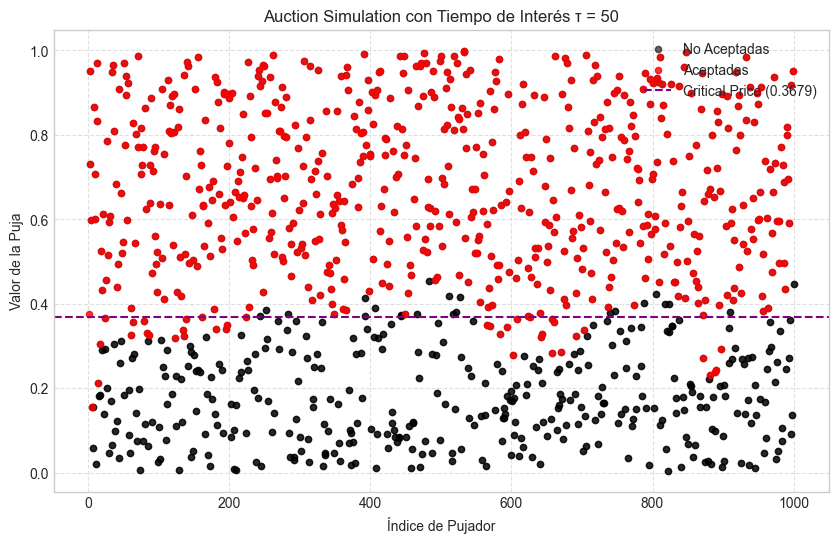

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
np.random.seed(42)
N   = 1000              # número total de pujas
tau = 50                # tiempo de interés (en número de pujas posteriores)
bids = np.random.uniform(0, 1, N)

# Listas de resultados
accepted_bids            = []
accepted_bid_indices     = []
non_accepted_bids        = []
non_accepted_bid_indices = []

# Pendientes: lista de tuplas (valor, índice_de_llegada)
pending = []

# Recorremos todas las pujas
for i, bid in enumerate(bids, start=1):
    # 1) Expiración de pujas pendientes que llevan >= tau pasos
    #    (es decir, su índice_de_llegada <= i - tau)
    while pending and pending[0][1] <= i - tau:
        val_expired, idx_expired = pending.pop(0)
        non_accepted_bids.append(val_expired)
        non_accepted_bid_indices.append(idx_expired)

    # 2) Si ya no quedan pendientes, simplemente metemos la nueva
    if not pending:
        pending.append((bid, i))
        continue

    # 3) Hallamos la puja máxima entre las que siguen activas
    max_val, max_idx = max(pending, key=lambda x: x[0])

    # 4) Aplicamos la regla de venta
    if bid < max_val:
        # vendemos la puja máxima
        accepted_bids.append(max_val)
        accepted_bid_indices.append(max_idx)
        pending.remove((max_val, max_idx))

        # la actual entra como pendiente (no aceptada ahora)
        non_accepted_bids.append(bid)
        non_accepted_bid_indices.append(i)
        pending.append((bid, i))
    else:
        # no se vende, acumulamos esta puja como pendiente
        non_accepted_bids.append(bid)
        non_accepted_bid_indices.append(i)
        pending.append((bid, i))

# 5) Al finalizar, todas las que queden en pending
#    habrán caducado o se congelan como no aceptadas
for val, idx in pending:
    non_accepted_bids.append(val)
    non_accepted_bid_indices.append(idx)

# --- Preparamos la gráfica ---
plt.figure(figsize=(10, 6))
plt.scatter(non_accepted_bid_indices, non_accepted_bids,
            c='black', label='No Aceptadas', s=20, alpha=0.6)
plt.scatter(accepted_bid_indices, accepted_bids,
            c='red', label='Aceptadas', s=20, alpha=0.8)

critical_price = 1/np.e
plt.axhline(y=critical_price, color='purple', linestyle='--',
            label=f'Critical Price ({critical_price:.4f})')

plt.title(f'Auction Simulation con Tiempo de Interés τ = {tau}')
plt.xlabel('Índice de Pujador')
plt.ylabel('Valor de la Puja')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

## Paciencia individual

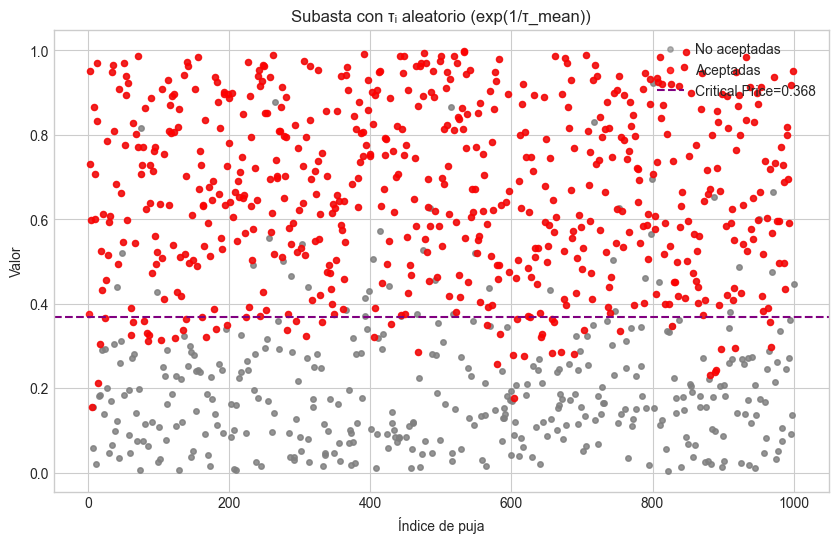

In [84]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

N        = 1000       # nº total de pujas
tau_mean = 50         # media para el tau de cada puja
bids     = np.random.uniform(0, 1, N)

accepted_vals, accepted_idx = [], []
nonacc_vals,  nonacc_idx   = [], []

# Cada pendiente: (valor, llegada_i, tau_i)
pending = []

for j, bid in enumerate(bids, start=1):
    # 1) Generar un tau_i para la puja actual
    tau_i = np.random.exponential(scale=tau_mean)
    
    # 2) Expirar las pendientes cuyo plazo se ha cumplido
    #    (mientras hayan y la más antigua ya esté caducada)
    pending = [(v, t0, τ) for (v, t0, τ) in pending if j < t0 + τ or \
               (nonacc_vals.append(v) or nonacc_idx.append(t0) or False)]
    # nota: la list-comp descarta y a la vez registra los expirados

    # 3) Si no hay pendientes activas, la metemos directamente
    if not pending:
        pending.append((bid, j, tau_i))
        continue

    # 4) Hallar la pendiente de mayor valor activo
    v_max, t0_max, τ_max = max(pending, key=lambda x: x[0])

    # 5) Regla de venta
    if bid < v_max:
        # vendemos v_max
        accepted_vals.append(v_max)
        accepted_idx.append(t0_max)
        pending.remove((v_max, t0_max, τ_max))

        # la actual entra como pendiente no aceptada aún
        nonacc_vals.append(bid)
        nonacc_idx.append(j)
        pending.append((bid, j, tau_i))
    else:
        # no se vende, se añade como pendiente
        nonacc_vals.append(bid)
        nonacc_idx.append(j)
        pending.append((bid, j, tau_i))

# 6) Al final, lo que quede en pending caduca
for v, t0, τ in pending:
    nonacc_vals.append(v)
    nonacc_idx.append(t0)

# --- Plotting ---
plt.figure(figsize=(10,6))
plt.scatter(nonacc_idx, nonacc_vals, c='gray', s=15, alpha=0.6, label='No aceptadas')
plt.scatter(accepted_idx, accepted_vals, c='red',  s=20, alpha=0.8, label='Aceptadas')

cp = 1/np.e
plt.axhline(cp, color='purple', linestyle='--', label=f'Critical Price={cp:.3f}')
plt.title('Subasta con τᵢ aleatorio (exp(1/τ_mean))')
plt.xlabel('Índice de puja')
plt.ylabel('Valor')
plt.legend(); plt.grid(True)
plt.show()

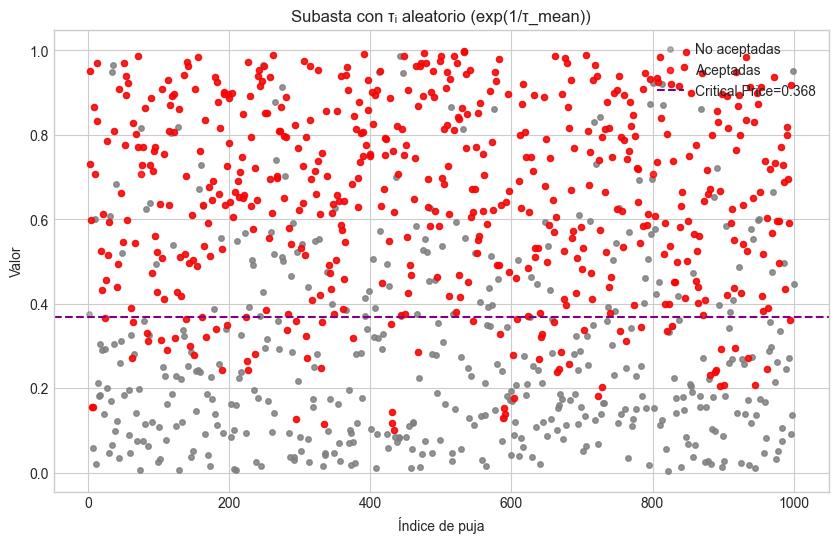

In [85]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

N        = 1000       # nº total de pujas
tau_mean = 10         # media para el tau de cada puja
bids     = np.random.uniform(0, 1, N)

accepted_vals, accepted_idx = [], []
nonacc_vals,  nonacc_idx   = [], []

# Cada pendiente: (valor, llegada_i, tau_i)
pending = []

for j, bid in enumerate(bids, start=1):
    # 1) Generar un tau_i para la puja actual
    tau_i = np.random.exponential(scale=tau_mean)
    
    # 2) Expirar las pendientes cuyo plazo se ha cumplido
    #    (mientras hayan y la más antigua ya esté caducada)
    pending = [(v, t0, τ) for (v, t0, τ) in pending if j < t0 + τ or \
               (nonacc_vals.append(v) or nonacc_idx.append(t0) or False)]
    # nota: la list-comp descarta y a la vez registra los expirados

    # 3) Si no hay pendientes activas, la metemos directamente
    if not pending:
        pending.append((bid, j, tau_i))
        continue

    # 4) Hallar la pendiente de mayor valor activo
    v_max, t0_max, τ_max = max(pending, key=lambda x: x[0])

    # 5) Regla de venta
    if bid < v_max:
        # vendemos v_max
        accepted_vals.append(v_max)
        accepted_idx.append(t0_max)
        pending.remove((v_max, t0_max, τ_max))

        # la actual entra como pendiente no aceptada aún
        nonacc_vals.append(bid)
        nonacc_idx.append(j)
        pending.append((bid, j, tau_i))
    else:
        # no se vende, se añade como pendiente
        nonacc_vals.append(bid)
        nonacc_idx.append(j)
        pending.append((bid, j, tau_i))

# 6) Al final, lo que quede en pending caduca
for v, t0, τ in pending:
    nonacc_vals.append(v)
    nonacc_idx.append(t0)

# --- Plotting ---
plt.figure(figsize=(10,6))
plt.scatter(nonacc_idx, nonacc_vals, c='gray', s=15, alpha=0.6, label='No aceptadas')
plt.scatter(accepted_idx, accepted_vals, c='red',  s=20, alpha=0.8, label='Aceptadas')

cp = 1/np.e
plt.axhline(cp, color='purple', linestyle='--', label=f'Critical Price={cp:.3f}')
plt.title('Subasta con τᵢ aleatorio (exp(1/τ_mean))')
plt.xlabel('Índice de puja')
plt.ylabel('Valor')
plt.legend(); plt.grid(True)
plt.show()

# Impaciencia del vendedor

Vende tras pasar 50 ofertas al candidato a pesar de no esperar

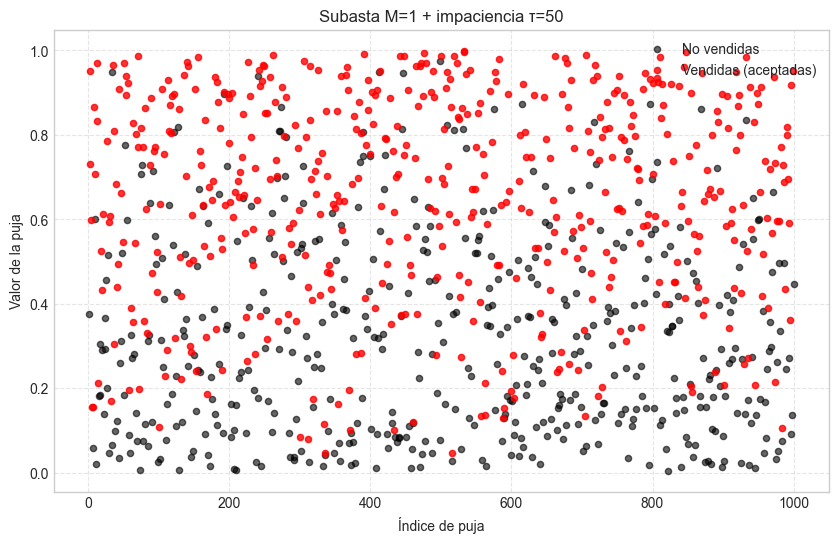

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
np.random.seed(42)
N   = 1000
tau = 50                        # impaciencia: espera máxima de tau pujas
bids = np.random.uniform(0,1,N) # secuencia de pujas

# Para acumular resultados
accepted_vals  = []  # precios de venta
accepted_times = []  # momentos en que se vendió el candidato
all_times      = list(range(1, N+1))
all_vals       = bids.copy()

# Estado interno: el único candidato pendiente
pending_val  = None  # valor de la puja máxima actual
pending_time = None  # instante en que llegó dicho candidato

# Recorremos las pujas
for t, b in enumerate(bids, start=1):
    if pending_val is None:
        # primera puja: la guardamos como candidato
        pending_val, pending_time = b, t
        continue

    # 1) ¿ha expirado la paciencia?
    if t - pending_time >= tau:
        # cierro venta al precio pending_val
        accepted_vals.append(pending_val)
        accepted_times.append(pending_time)
        # el nuevo bid arranca un nuevo candidato
        pending_val, pending_time = b, t
        continue

    # 2) ¿me rebaja la nueva puja?
    if b < pending_val:
        # vendo el pending_val
        accepted_vals.append(pending_val)
        accepted_times.append(pending_time)
        # ahora el nuevo bid pasa a ser el candidato
        pending_val, pending_time = b, t
    else:
        # 3) ni vence la paciencia ni me rebaja: 
        #    reemplazo el candidato por el bid (es el nuevo máximo)
        pending_val, pending_time = b, t

# Al final, el candidato que quede nunca se vende
# (podrías decidir que expire también, pero aquí lo tratamos como no‐vendido)

# Preparo listas de no‐aceptadas
nonacc_times = [t for t in all_times if t not in accepted_times]
nonacc_vals  = [all_vals[t-1] for t in nonacc_times]

# ====== Plot ======
plt.figure(figsize=(10,6))
plt.scatter(nonacc_times, nonacc_vals,
            c='black', s=20, alpha=0.6, label='No vendidas')
plt.scatter(accepted_times, accepted_vals,
            c='red',   s=20, alpha=0.8, label='Vendidas (aceptadas)')

plt.title(f'Subasta M=1 + impaciencia τ={tau}')
plt.xlabel('Índice de puja')
plt.ylabel('Valor de la puja')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# Impaciencia con precio de reserva

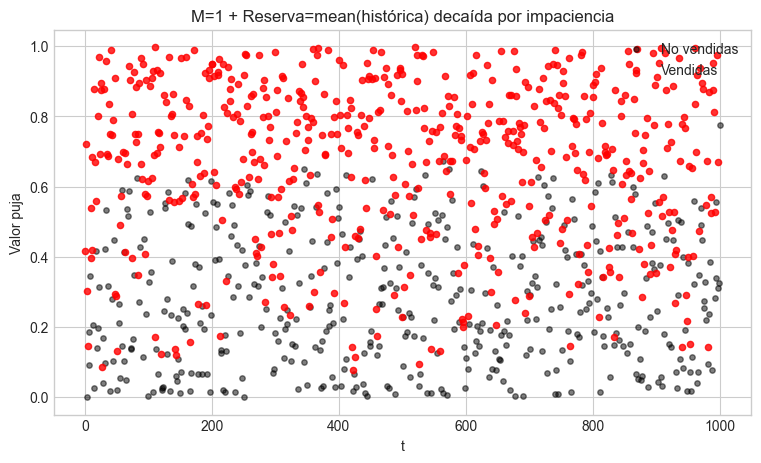

In [88]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
N       = 1000
bids    = np.random.uniform(0,1,N)
lambda_ = 0.01       # velocidad de decaimiento de la reserva
accepted = []        # precios a los que realmente vendemos
times_acc = []       # instantes de esas ventas

# Estado interno
cand_val  = None     # valor del candidato (M=1)
cand_time = None     # tiempo en que entró el candidato
t_last    = 0        # último instante de venta
R0        = 1/np.e   # reserva inicial si no hay ventas previas

for t, b in enumerate(bids, start=1):
    # 1) Calculo reserva vigente con impaciencia
    if accepted:
        R0 = np.mean(accepted)                # actualizo referencia
    R_t = R0 * np.exp(-lambda_ * (t - t_last))  

    # 2) Si no hay candidato, b arranca uno nuevo
    if cand_val is None:
        cand_val, cand_time = b, t
        continue

    # 3) Regla underbid: si b < candidato → vendo al precio candidato
    if b < cand_val:
        accepted.append(cand_val)
        times_acc.append(cand_time)
        t_last = t
        # re‐arranco candidato con la puja actual
        cand_val, cand_time = b, t
        continue

    # 4) Regla impaciencia/ref. decaída: si candidato ≥ R_t → vendo candidato
    if cand_val >= R_t:
        accepted.append(cand_val)
        times_acc.append(cand_time)
        t_last = t
        # ahora la puja b arranca un nuevo candidato
        cand_val, cand_time = b, t
        continue

    # 5) En cualquier otro caso b > candidato → b se convierte en nuevo candidato
    cand_val, cand_time = b, t

# 6) Al final, nunca vendemos el último candidato (o podrías infeir venta forzada)
    
# Para graficar
all_times = np.arange(1, N+1)
all_vals  = bids
nonacc_t  = [i for i in all_times if i not in times_acc]
nonacc_v  = [all_vals[i-1] for i in nonacc_t]

plt.figure(figsize=(9,5))
plt.scatter(nonacc_t, nonacc_v, c='black', alpha=0.5, s=15, label='No vendidas')
plt.scatter(times_acc, accepted, c='red', alpha=0.8, s=20, label='Vendidas')
plt.title('M=1 + Reserva=mean(histórica) decaída por impaciencia')
plt.xlabel('t'); plt.ylabel('Valor puja')
plt.legend(); plt.grid(True)
plt.show()